<a href="https://colab.research.google.com/github/Th4l3s-pr0g/estudo-IA-CC/blob/main/SVMCancerDiagnostic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passo 1: Importar os dados do CSV para o Python por meio do Pandas

In [ ]:
import pandas as pd
dataframe = pd.read_csv('/content/wdbc.csv')
print("Quantidade de registros:", len(dataframe))
print("Quantidade de colunas:", len(dataframe.columns))

Quantidade de registros: 569
Quantidade de colunas: 32


Passo 2: vamos ver os primeiros registros do dataframe

In [ ]:
dataframe.head()

,ID number,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Passo 2.1: Vamos ver mais informaçãoes sobre o dataframe

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   mean radius              569 non-null    float64
 3   mean texture             569 non-null    float64
 4   mean perimeter           569 non-null    float64
 5   mean area                569 non-null    float64
 6   mean smoothness          569 non-null    float64
 7   mean compactness         569 non-null    float64
 8   mean concavity           569 non-null    float64
 9   mean concave points      569 non-null    float64
 10  mean symmetry            569 non-null    float64
 11  mean fractal dimension   569 non-null    float64
 12  radius error             569 non-null    float64
 13  texture error            569 non-null    float64
 14  perimeter error          5

Passo 3: Vimos que a coluna 'Diagnosis' está com dados tipo string. No entanto, é pertinente que esse dado seja transformado para numérico.

In [ ]:
dataframe['Diagnosis'] = dataframe['Diagnosis'].map({'B':0, 'M':1})
dataframe

,ID number,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Passo 4: para continuarmos a análise exploratória, vamos ver se os dados são balanceados, ou seja, se há uma boa amostra de registro para cada tipo de tumor.

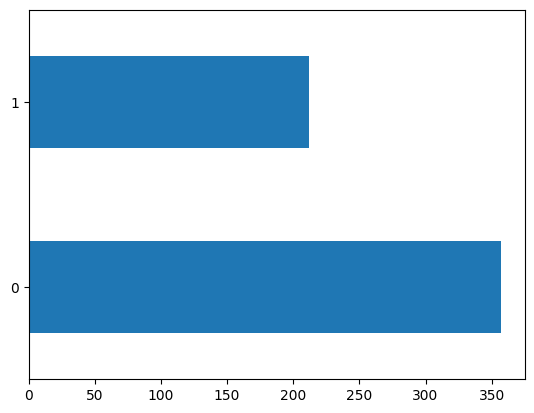

In [ ]:
import matplotlib.pyplot as plt

dataframe['Diagnosis'].value_counts().plot(kind='barh')
plt.show()

Passo 5: vamos verificar a correlação entre as variáveis e o tipo de tumor.

In [ ]:
dataframe.corr()

,ID number,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
ID number,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
Diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
mean radius,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


Passo 6: agor que analisamos a correlação entra as variáveis, vamos selecionar 9 variáveis independentes

In [ ]:
variaveisIndependentes = ['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
                          'mean concave points', 'worst radius', 'worst perimeter',
                          'worst area', 'worst concave points']
X = dataframe[variaveisIndependentes]
X

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concave points
0,17.99,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.2654
1,20.57,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.1860
2,19.69,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.2430
3,11.42,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.2575
4,20.29,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.1625
...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.2216
565,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.1628
566,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.1418
567,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.2650


Passo 7: agora vamos separar a variável dependente

In [ ]:
y = dataframe['Diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

Passo 8: agora vamos separar o conjunto de dados de teste. Vamos separar 20% para teste e 80% para treinamento

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print("Quantidade de registros separados para treinamento:", len(X_train))
print("Quantidade de registros separados para teste:", len(X_test))

Quantidade de registros separados para treinamento: 455
Quantidade de registros separados para teste: 114


Passo 9: O SVM é sensível à escala dos dados. Portanto é coerente que os dados sejam normalizados antes de treinar o modelo.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Passo 10: agora que os dados estão preparados, vamos aplicar o svm

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)

SVC(kernel='linear')

Passo 11: agora que o modelo foi treinado, vamos ver a sua acurácia. Para isso, iremos prever os valores separados para teste e depois faremos a comparação do previsto com o grau de acerto.

In [ ]:
y_pred = clf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("Acurácia do modelo:", accuracy_score(y_test,y_pred))

Acurácia do modelo: 0.956140350877193


Agora utilizando Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
objClassificador = LogisticRegression()
objClassificador.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
# Primeiro, vamos pedir para o classificador classificar
# os dados utilizados no treinamento
y_pred = objClassificador.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.9472527472527472


In [ ]:
y_pred_test = objClassificador.predict(X_test)
accuracyTest = accuracy_score(y_test,y_pred_test)
print("Acurácia do modelo com dados de teste",accuracyTest)

Acurácia do modelo com dados de teste 0.9385964912280702
